## 2. Movies Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data preprocessing is required to convert into transaction format
m = pd.read_csv("my_movies.csv")
m

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [3]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [4]:
m.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [5]:
# Data preprocessing is required to convert into transaction format
ms = m.drop(['V1','V2','V3','V4','V5'], axis = 1)
ms

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [6]:
ms.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


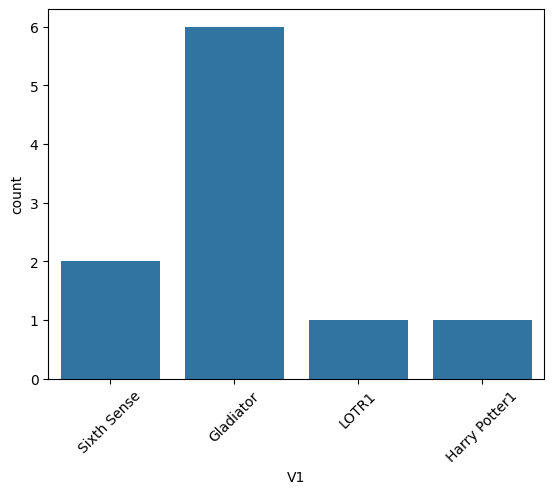

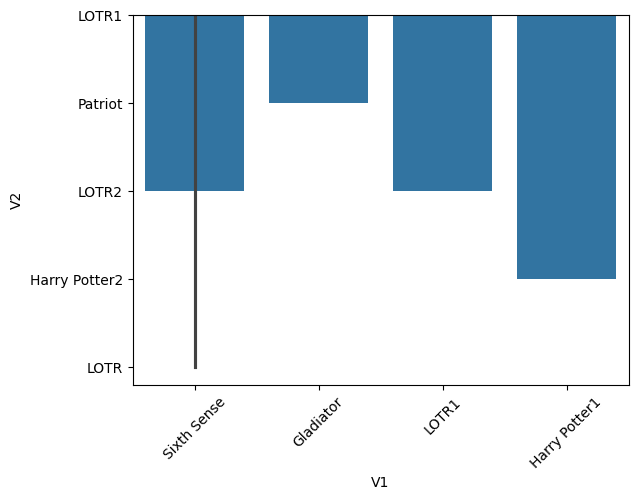

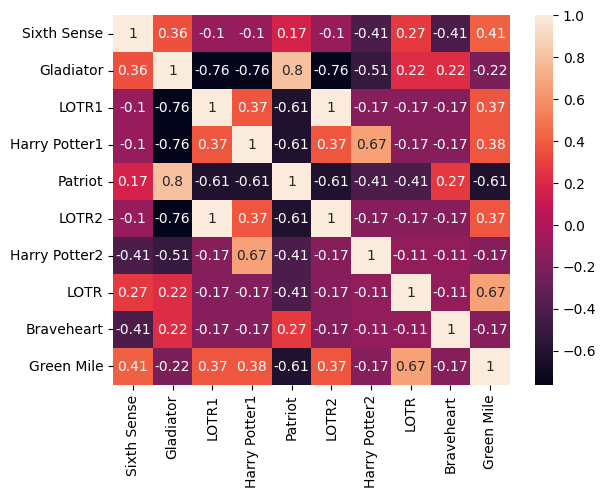

In [7]:
# prompt: do visualization

import matplotlib.pyplot as plt
# Visualize the number of movies watched by each user
sns.countplot(x = 'V1', data = m)
plt.xticks(rotation = 45)
plt.show()

# Visualize the average rating given by each user
sns.barplot(x = 'V1', y = 'V2', data = m)
plt.xticks(rotation = 45)
plt.show()

# Visualize the correlation between the ratings given by different users
sns.heatmap(m.corr(), annot = True)
plt.show()


In [8]:
apri = apriori(ms, min_support=0.2, use_colnames=True)
apri

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Green Mile, Sixth Sense)"


In [9]:
r2 = association_rules(apri, metric="lift", min_threshold=0.6)
r2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

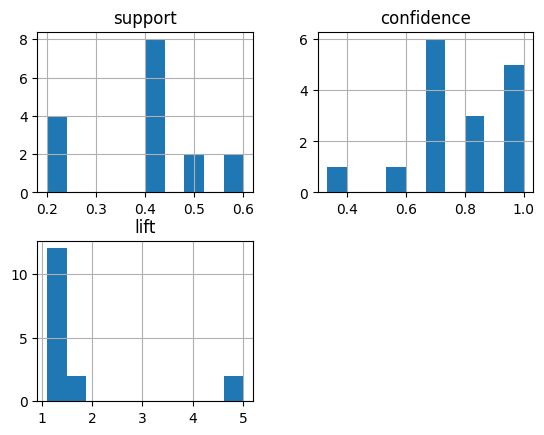

In [10]:
r2[['support','confidence','lift']].hist()


<Axes: xlabel='support', ylabel='confidence'>

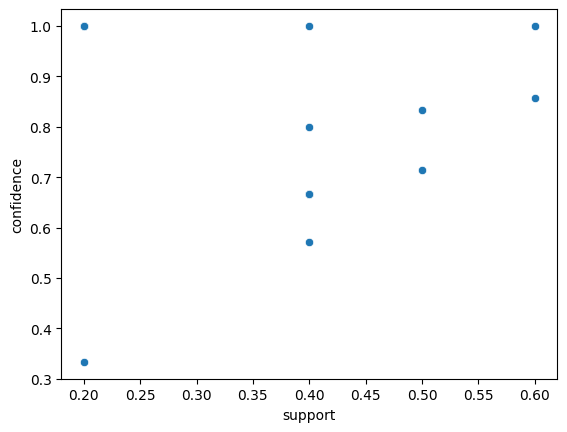

In [11]:
sns.scatterplot(x=r2['support'],y=r2['confidence'])

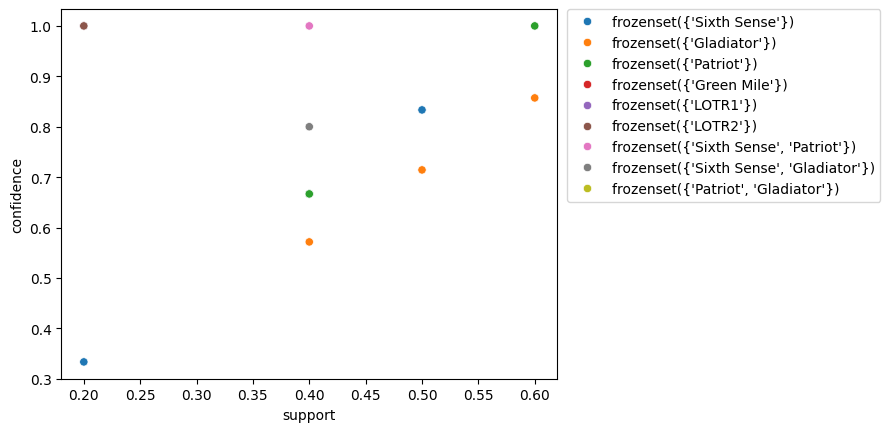

In [12]:
sns.scatterplot(x='support', y='confidence', data=r2, hue='antecedents')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [13]:
aprii = apriori(ms,min_support=0.05,use_colnames=True)
aprii

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [14]:
r3=association_rules(aprii,metric='lift',min_threshold=0.8)
r3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
241,(Green Mile),"(LOTR1, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
242,(Harry Potter1),"(LOTR1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
243,(Sixth Sense),"(Harry Potter1, LOTR1, Green Mile, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
244,(LOTR1),"(Harry Potter1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


In [15]:
r3[r3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20,0.250000
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
241,(Green Mile),"(LOTR1, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
242,(Harry Potter1),"(LOTR1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
243,(Sixth Sense),"(Harry Potter1, LOTR1, Green Mile, LOTR2)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000
244,(LOTR1),"(Harry Potter1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000


array([[<Axes: title={'center': 'support'}>,
        <Axes: title={'center': 'confidence'}>],
       [<Axes: title={'center': 'lift'}>, <Axes: >]], dtype=object)

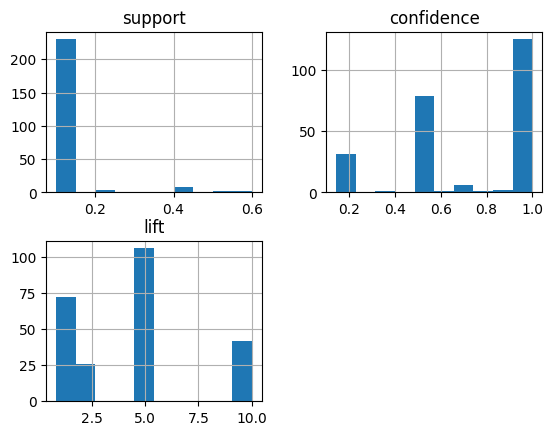

In [16]:
r3[['support','confidence','lift']].hist()

<Axes: xlabel='support', ylabel='confidence'>

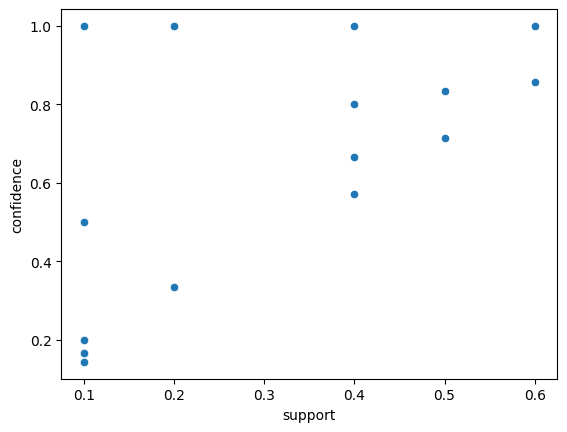

In [17]:
sns.scatterplot(x=r3['support'],y=r3['confidence'])

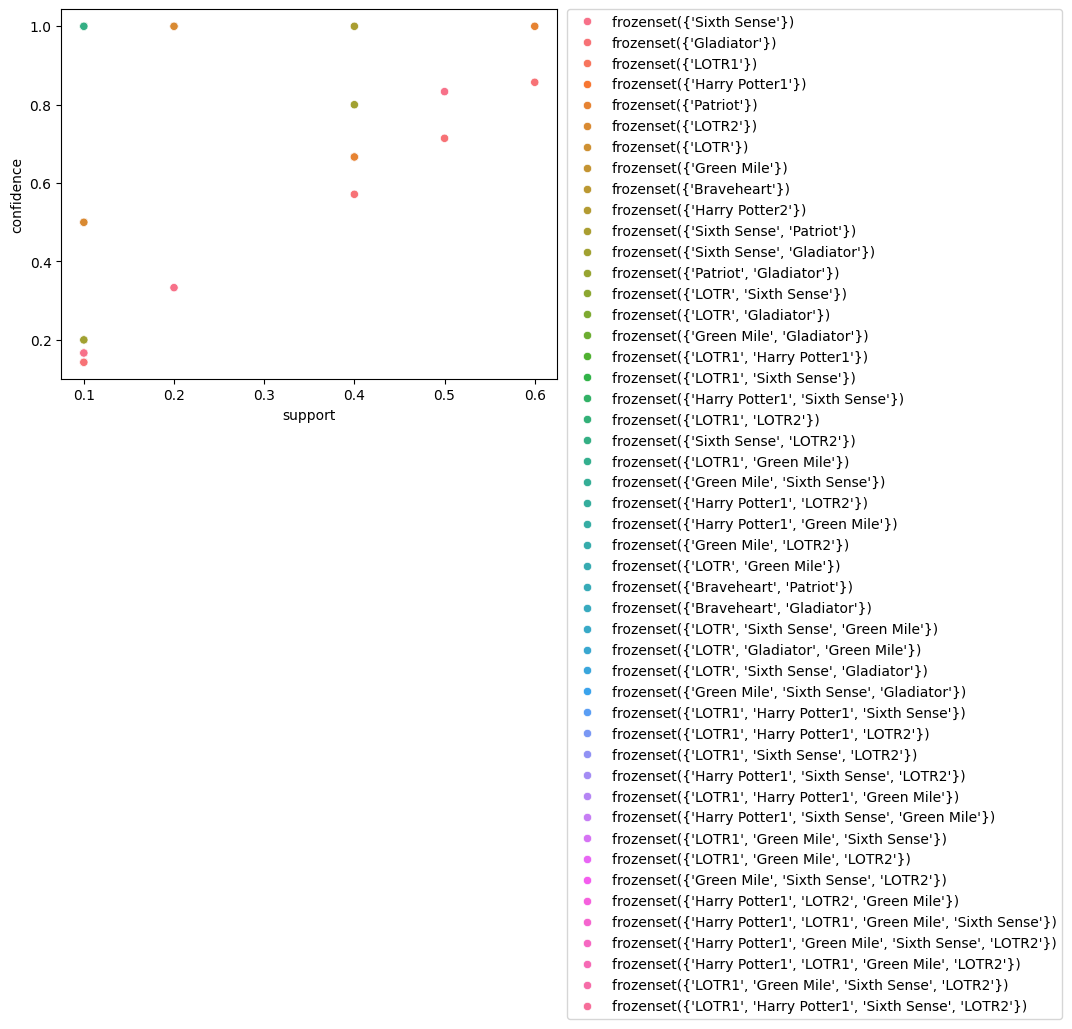

In [18]:
sns.scatterplot(x='support', y='confidence', data=r3, hue='antecedents')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()